<a href="https://colab.research.google.com/github/rabinam24/NLP/blob/main/PatientCondition_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patient Condition Classification

## Here the dataset used is kaggledataset
 https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018

# Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec,KeyedVectors
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df_train='/content/drive/MyDrive/drugsComTrain_raw.csv'
df_test='/content/drive/MyDrive/drugsComTest_raw.csv'


In [4]:
df= pd.read_csv(df_train)

In [5]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
df.shape

(161297, 7)

In [7]:
df['condition'].value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

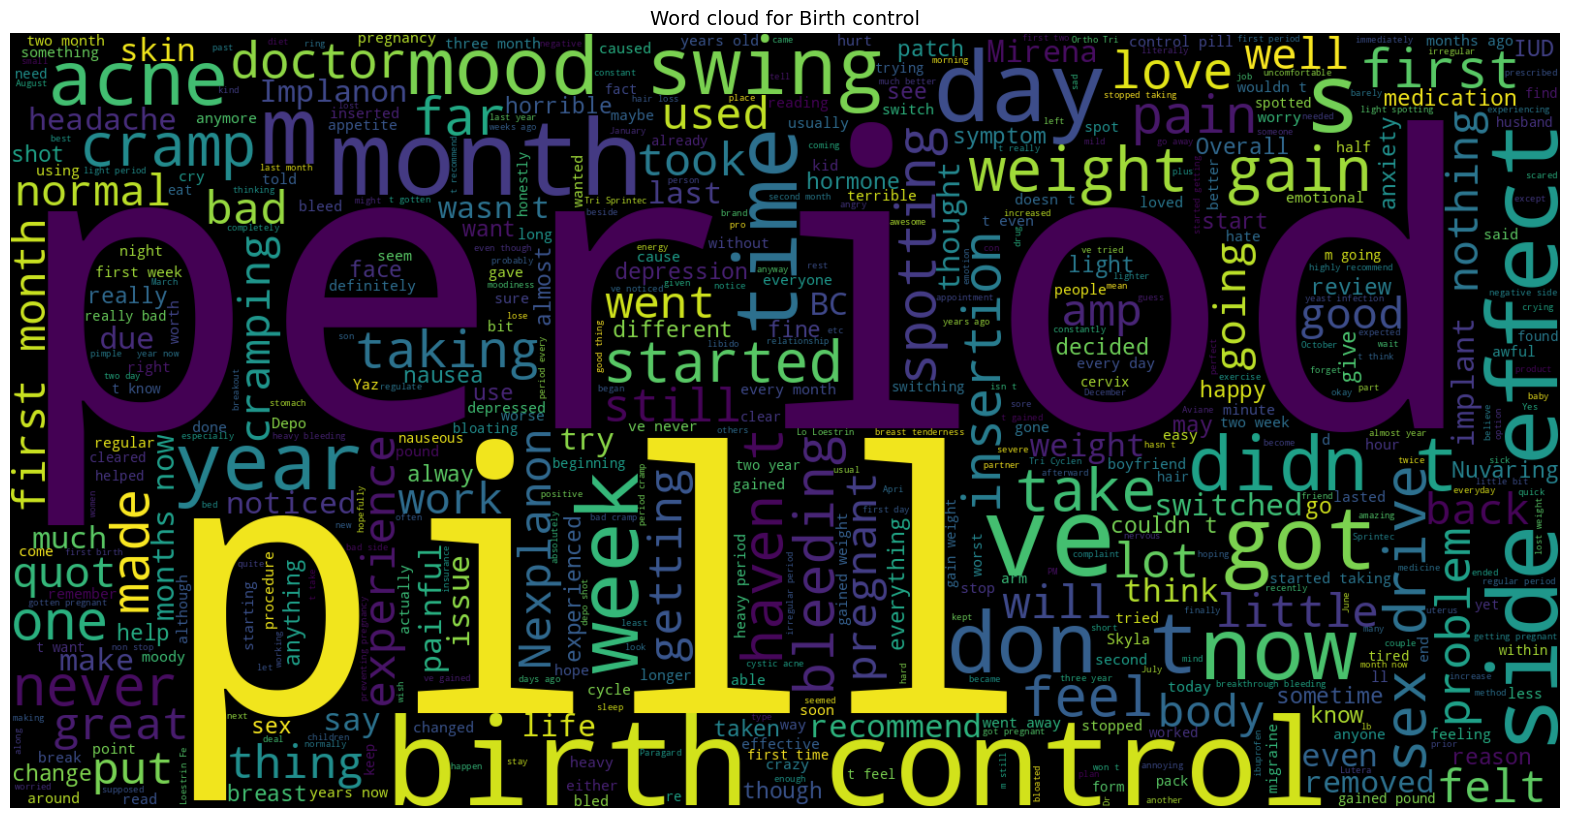

In [8]:
# Filter DataFrame for the specified condition
birth_control_reviews = df[df['condition'] == 'Birth Control']

# Generate WordCloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(birth_control_reviews['review']))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Birth control', fontsize=14)
plt.axis('off')  # Turn off axis
plt.show()


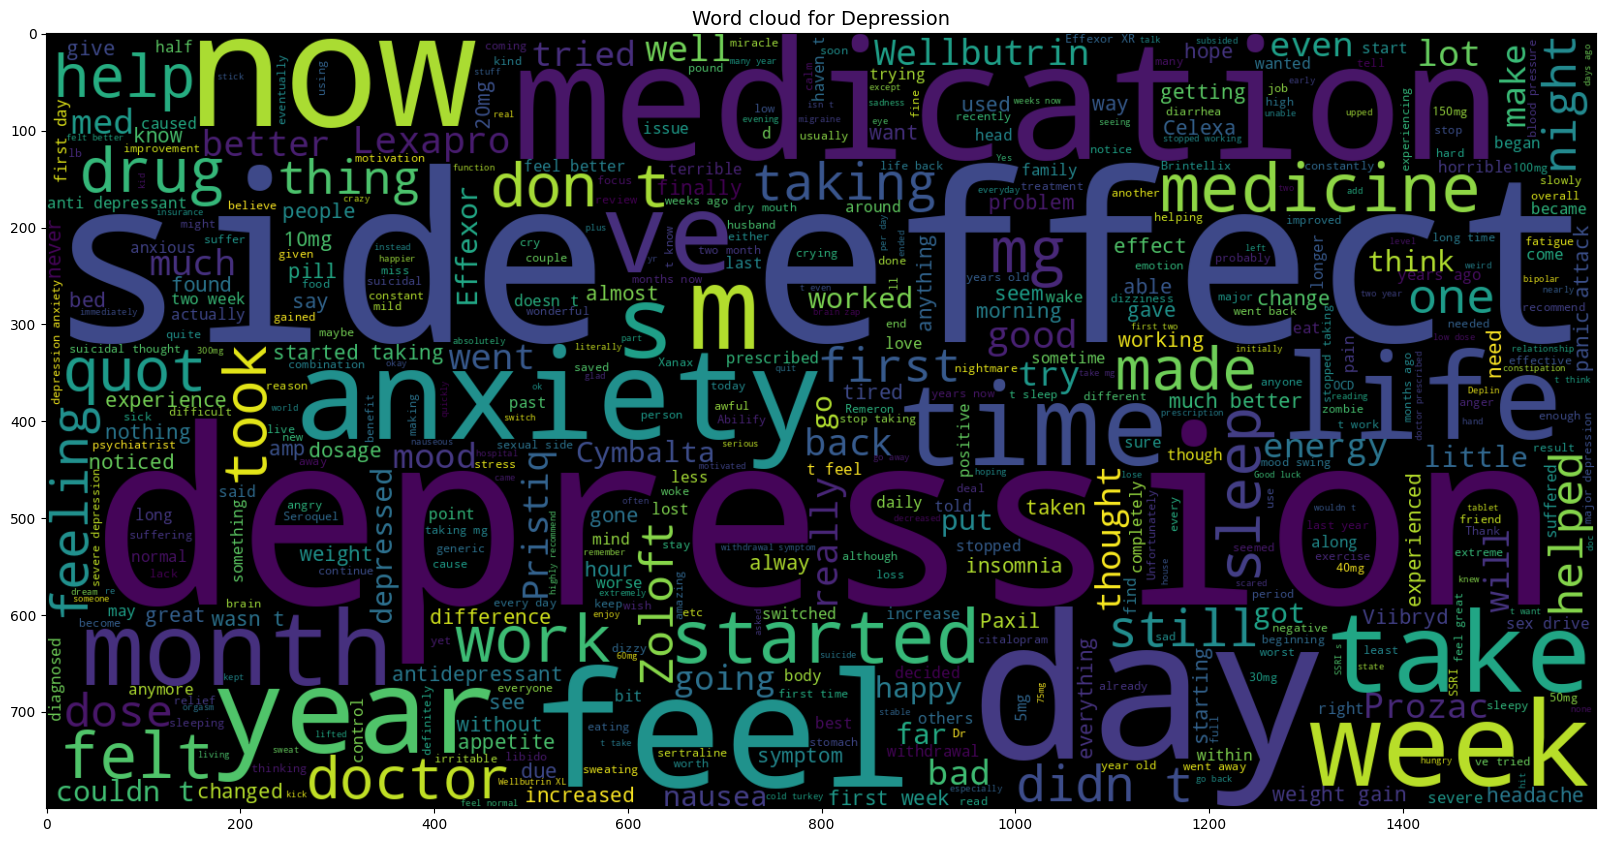

In [14]:
depression_reviews = df[df['condition'] == 'Depression']
plt.figure(figsize=(20, 20))  # Text that is Fake News Headlines
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(depression_reviews['review']))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Depression', fontsize=14)
plt.show()


In [17]:
highbloodpressure_reviews = df[df['condition'] == 'highbloodpressure']

# Check for null or empty values in the 'review' column
null_or_empty_reviews = highbloodpressure_reviews['review'].isnull() | (highbloodpressure_reviews['review'] == '')

if null_or_empty_reviews.all():
    print("No valid reviews for High Blood Pressure condition.")
else:
    plt.figure(figsize=(20, 20))
    wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(highbloodpressure_reviews['review']))
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Word cloud for High Blood Pressure', fontsize=14)
    plt.show()


No valid reviews for High Blood Pressure condition.
